# PRÁTICA GUIADA: Clustering hierárquico

## 1. Introdução

Implementar um clustering hierárquico em Python é tão simples quanto invocar uma função do pacote SciPy.

```python
from scipy.cluster.hierarchy import linkage
Z = linkage(X, 'ward')
```

Aqui, `X` é a matriz de dados com a que trabalhamos, e `'ward'` define o método para calcular a distância entre os clusters. Nesse caso, usamos a distância de Ward (minimiza a diferença da soma quadrática das distâncias entre os clusters). Ao calcular a métrica específica de distância, o método implementa por padrão a distância euclideana.

Depois de estimar os clusters, teremos que calcular o dendrograma usando a função `dendrogram()` de SciPy e fazer a representação gráfica com base em `plt` de `matplotlib`.

Para avaliar o grau de eficiência do algoritmo que mediu a distância, podemos calcular o coeficiente de correlação de copehenic. Essa métrica quantifica a correlação entre as distâncias originais dos pontos e as distâncias entre os pontos (as alturas do dendrograma no ponto em que os dois ramos se unem), e também permite avaliar se o clustering funcionou bem.

```python
c, coph_dists = cophenet(Z, pdist(X))
```
É possível invocar a função que calcula o coeficiente a partir de SciPy e aplicá-la ao conjunto clusterizado (`Z`) e à distância do conjunto original (`X`). 

### Outros recursos

* [Documentação de SciPy para análise de clustering](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
* [O que é uma análise de clustering hierárquico?](http://www.saedsayad.com/clustering_hierarchical.htm)

## 2. Preparar a análise e trabalhar com os dados

Vamos trabalhar sobre um conjunto de dados que detalha as habilidades de idiomas de diferentes países europeus. Vamos fazer uma análise de cluster hierárquico nesse conjunto de dados.

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
import matplotlib
%matplotlib inline

Vamos usar SciPy para a análise. Já conhecemos bem o conjunto de dados, então podemos passar direto para a análise dos dados...

In [0]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Extraímos os dados para uma matriz para poder passá-los ao algoritmo de clustering. Com o formato matriz (ou np.array), é mais fácil para o algoritmo calcular as distâncias.

In [0]:
X = data.data
type(X)

numpy.ndarray

## 3. Calcular clusters

Implementamos o algoritmo de clustering hierárquico usando o método de `ward`

In [0]:
Z = linkage(X, 'ward')

Agora, calculamos o coeficiente de correlação de cophenetic para avaliar a eficiência do cálculo das medidas de distância entre os pontos.

In [0]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.87260152506447042

O “C” deveria ser ao redor de 0.87, o que implica que as distâncias entre os clusters estão bastante correlacionadas às distâncias originais dos dados. Ou seja, o clustering parece preservar bastante a estrutura de distâncias dos dados originais.

Vamos traçar um dendrograma. Para fazer isso, é necessário invocar o dendrograma a partir de `scipy.cluster.hierarchy`, passar os links como inputs e fazer uma rotação das tags para que possamos ver o gráfico de forma um pouco mais organizada. Podemos traçar o dendrograma com `pyplot` de `matplotlib`


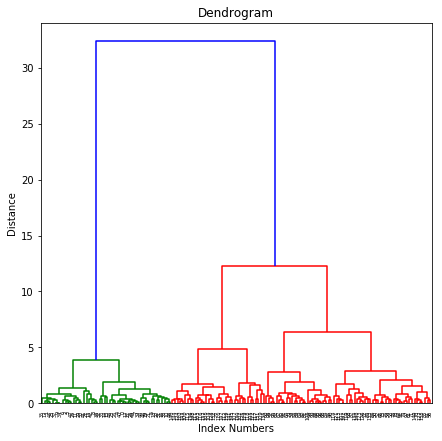

In [0]:
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,
)
plt.show()

O próximo passo é definir os clusters. Existem muitas formas de automatizar esse processo, mas uma boa possibilidade é estimar os clusters (a quantidade) através de uma análise visual do dendrograma. Além disso, isso ajudará a entender a lógica e a estrutura por trás desse tipo de gráficos.

Contudo, como geramos os clusters no fim das contas?

1. definimos a quantidade de clusters que vamos usar (inspecionando o dendrograma)
2. usamos a função `fcluster` da biblioteca `scipy.cluster.hierarchy` que retorna um array com o pertencimento de cada observação a um cluster.

Onde vocês definiriam o número ideal de clusters nesse dendrograma?

In [0]:
max_dist = 7.5
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

<function matplotlib.pyplot.show>

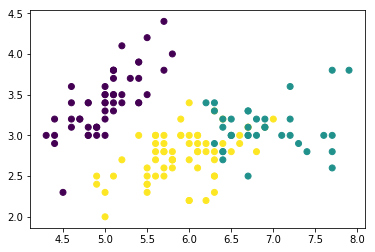

In [0]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show

Contudo, neste caso, podemos ver que não existe um agrupamento a uma distância maior de aproximadamente 35. O que acontece se definimos a distância máxima nesse ponto?

In [0]:
max_dist = 35
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Por último, vamos a realizar un gráfico de las clusters...

<function matplotlib.pyplot.show>

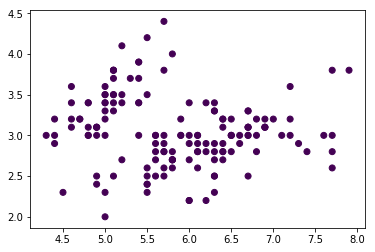

In [0]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show

Para terminar, vamos ver o que acontece se alteramos o método de geração dos clusters. Vamos testar os seguintes linkages:

- ward
- average
- complete
- single

In [0]:
def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

ward 0.872601525064
single 0.86357244036
average 0.876696652921
complete 0.727170309992


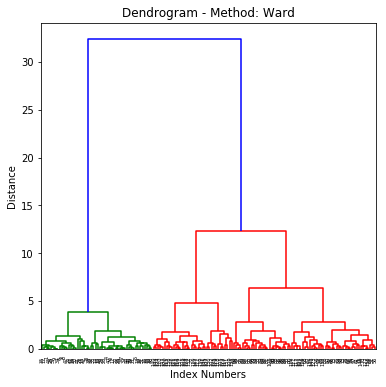

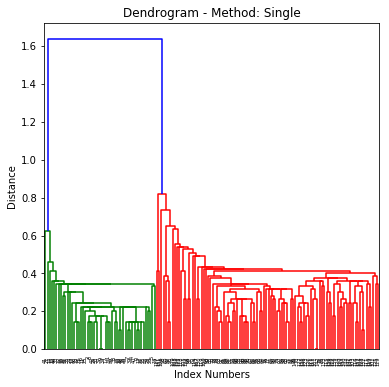

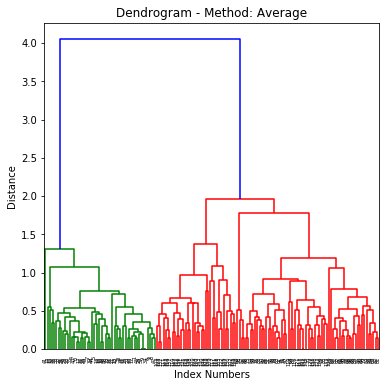

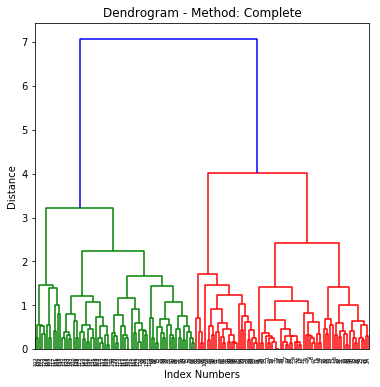

In [0]:
for i in ['ward','single','average','complete']:
    eval_clusters_linkage(X, i)